# Clustering

Imports

In [9]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [10]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
data_path = "../data/txt/"

### Choisir une décennie

In [12]:
DECADE = '1890'

Charger tous les  fichiers de la décennie et en créer une liste de textes

In [13]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [14]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

### Vectoriser les documents à l'aide de TF-IDF

In [15]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

Instancier le modèle TF-IDF avec ses arguments

In [16]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [17]:
tfidf_vectors = vectorizer.fit_transform(texts)

C:\Users\mau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
# Détail de la matrice
tfidf_vectors

<688x3207 sparse matrix of type '<class 'numpy.float64'>'
	with 444777 stored elements in Compressed Sparse Row format>

Imprimer le vecteur tf-IDF du premier document

In [19]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

louer             0.406557
00                0.265823
notaire           0.255646
janvier           0.199655
ares              0.178524
                    ...   
expérience        0.000000
extra             0.000000
extraordinaire    0.000000
extrême           0.000000
♦                 0.000000
Length: 3207, dtype: float64

Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [20]:
N_CLUSTERS = 3

Instancier le modèle K-Means et ses arguments

In [21]:
km_model = KMeans(n_clusters=N_CLUSTERS)

Appliquer le clustering à l'aide de la fonction `fit_predict`

In [22]:
clusters = km_model.fit_predict(tfidf_vectors)

C:\Users\mau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\

In [23]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [24]:
pprint(dict(clustering))

{0: ['KB_JB838_1890-01-29_01-00004.txt',
     'KB_JB838_1890-04-01_01-00004.txt',
     'KB_JB838_1890-05-20_01-00004.txt',
     'KB_JB838_1890-06-07_01-00004.txt',
     'KB_JB838_1890-06-23_01-00004.txt',
     'KB_JB838_1890-07-09_01-00004.txt',
     'KB_JB838_1890-07-10_01-00004.txt',
     'KB_JB838_1890-07-15_01-00004.txt',
     'KB_JB838_1890-07-17_01-00004.txt',
     'KB_JB838_1890-08-01_01-00004.txt',
     'KB_JB838_1890-08-09_01-00004.txt',
     'KB_JB838_1890-08-19_01-00004.txt',
     'KB_JB838_1890-08-27_01-00004.txt',
     'KB_JB838_1890-09-15_01-00004.txt',
     'KB_JB838_1890-10-23_01-00004.txt',
     'KB_JB838_1890-10-26_01-00004.txt',
     'KB_JB838_1890-11-04_01-00004.txt',
     'KB_JB838_1890-11-17_01-00004.txt',
     'KB_JB838_1890-12-02_01-00004.txt',
     'KB_JB838_1890-12-11_01-00004.txt',
     'KB_JB838_1891-01-02_01-00004.txt',
     'KB_JB838_1891-02-11_01-00004.txt',
     'KB_JB838_1891-02-18_01-00004.txt',
     'KB_JB838_1891-03-20_01-00004.txt',
     'KB_JB838_1

### Visualiser les clusters

Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA

In [25]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [26]:
reduced_vectors[:10]

array([[ 0.11966916,  0.44080422],
       [-0.09791   ,  0.20652044],
       [-0.10195386,  0.19902055],
       [-0.07326525,  0.56386297],
       [-0.21658316, -0.12686015],
       [-0.23540572, -0.0728389 ],
       [-0.18188695, -0.09095336],
       [-0.10557937,  0.18557557],
       [-0.25686896, -0.19520013],
       [-0.2230681 , -0.06316757]])

### Générer le plot

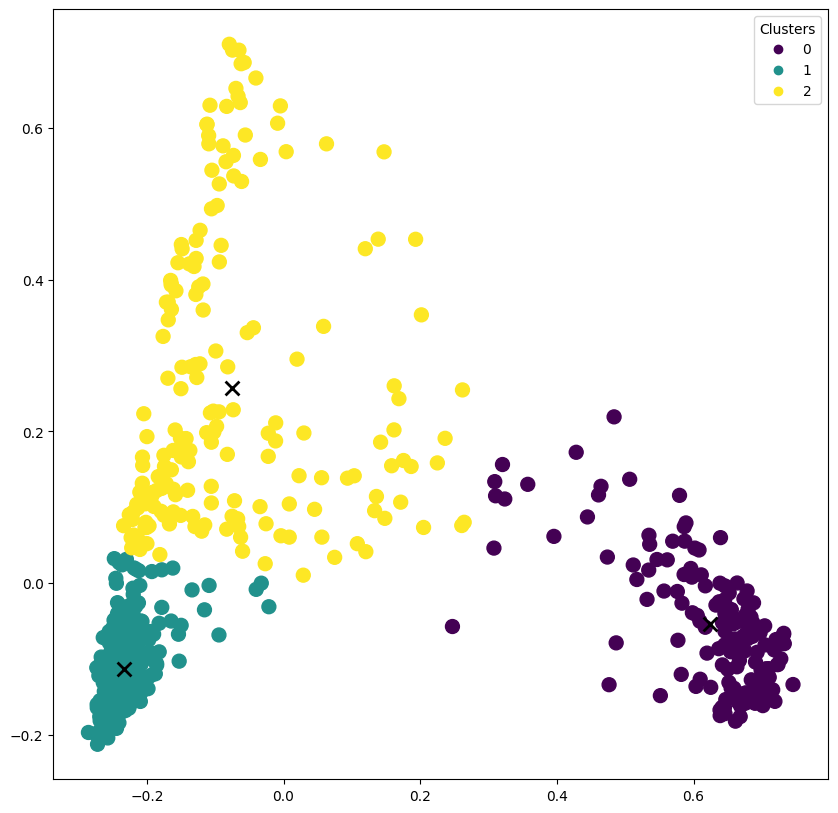

In [27]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Extraction de Keywords

Imports

In [ ]:
import os
import yake

### Extraire les keywords sur tous les documents

In [ ]:
for f in sorted(files)[:len(files)]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1890-01-06_01-00003.txt mentions these keywords: Maison rue, miss Sterly, grande maison, Sterly endormie, petite maison, maison rente, énormes griffes, rue Royale, louer bel, rue Thiéfry, apercevant miss...
KB_JB838_1890-01-08_01-00003.txt mentions these keywords: Manteaux Victoria, rue Haute, Jaquettes Jaquettes, rue Pachéco, Baume Pectoral, rue dés, d’agparells d'éclairage, MAISONS rue, rue Montoyer...
KB_JB838_1890-01-09_01-00003.txt mentions these keywords: rue Haute, rue Pachéco, rue Terre-Neuve, Crédit mobilier, dangereux chargement, chargement per-dessus, plus fermes, rue Royale, per-dessus bord...
KB_JB838_1890-01-12_01-00004.txt mentions these keywords: Bruxelles rue, notaire Jacobs, BONNE MAISON, dit notaire, Halles BRUXELLES, Maison Hirsch, notaire adjugera, UES MARGHAKIDÏSES, BRUXELLES PROCHAIN, Bruxelles Boulangerie, Adjudication préparatoire, PROPRIETE rue, BATIR rue...
KB_JB838_1890-01-15_01-00001.txt mentions these keywords: TIRAGE QUOTIDIEN, Ébtf mSèm, mSèm TI

# Nuages de mots

Imports et stopwords

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre"]
sw = set(sw)


### Ecrire tout le contenu dans un fichier temporaire

In [ ]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{DECADE}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(texts))

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

Créer la fonction de nettoyage

In [ ]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

Appliquer la fonction sur le fichier complet de la décennie

In [ ]:
clean_text(DECADE, folder=temp_path)

'Output has been written in ../data/tmp/1890_clean.txt!'

In [ ]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{DECADE}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'LIEN APERCEVANT MISS STERLY ENDORMIE PRÉOI NITA POSA PATTES JAMBES INFORTUNÉE FIT ÉNORMES GRIFFES TRÈS SÉRIEUS BLESSURES DPIIIPTCÜR REDENBACH JETA RÉSOLUMENT LION VÏETIME ASSEZ HEUREUX MAINFÈNIR JUSQU DOJÏIAY MISS STERLY ÉÛSSENT SORTIR CAGE GIGANTESQUE OMELETTE HIER VVERS HEURES MIDI IMMENSE VOITURE APPARTENANT THIBAUT DESCHAROPS ÉPICIERS GROS BOULEVARD RLAND PARIS PASSAIT GRAND TROT BBULEVAI SAINT GERMAIN QUAND HAUTEUR CHANTIERS ROUES CÔTÉ GAUCHE BRISÈRENT SIMUITANÊMENT CHOO VIOLENT QUO VÉHICUL'

### Générer le nuage de mots

Afficher les termes les plus fréquents


In [ ]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 25492), ('DEM', 13678), ('MAISON', 6864), ('BRUXELLES', 6192), ('ANS', 5970), ('PLACE', 5760), ('FILLE', 5338), ('DEMANDE', 4965), ('LOUER', 4833), ('PRIX', 4587)]


Créer, stocker et afficher le nuage de mots

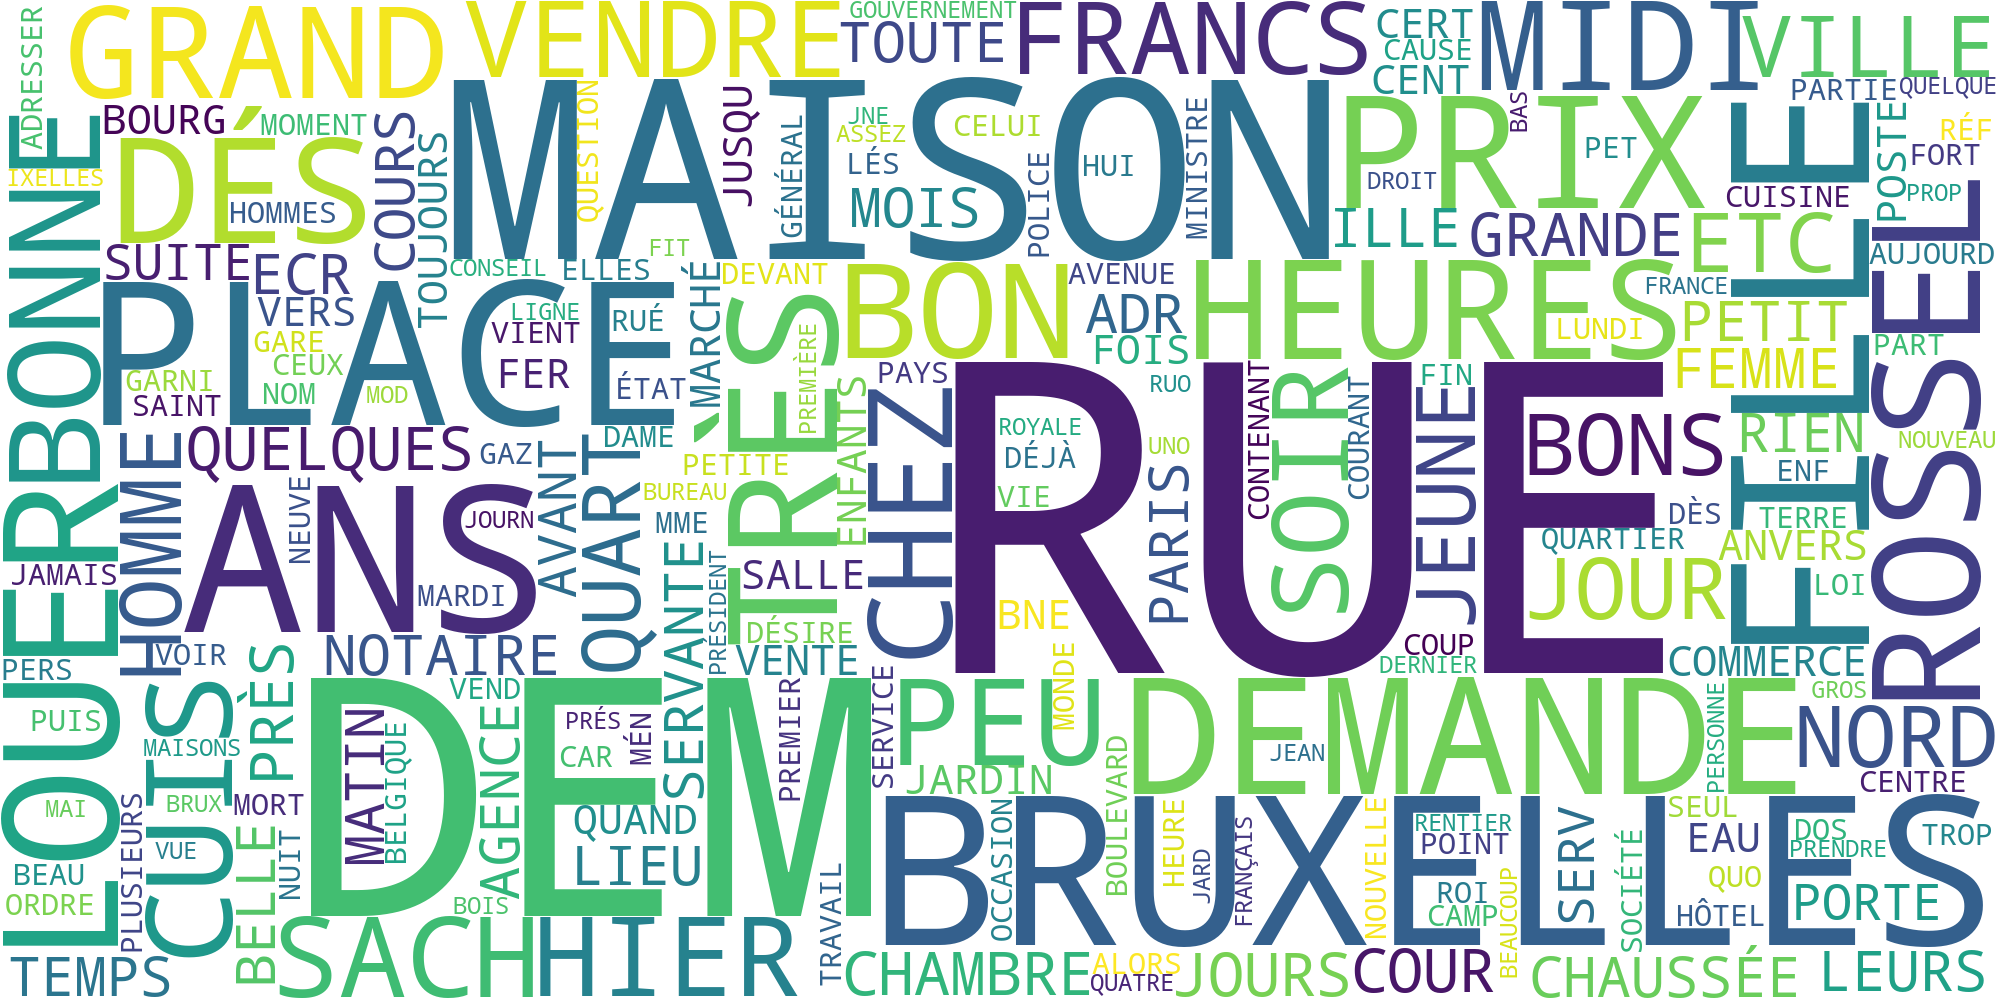

In [ ]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{DECADE}.png"))
Image(filename=os.path.join(temp_path, f"{DECADE}.png"))

# Word Embeddings : le modèle Word2Vec

Imports

In [ ]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

### Chargement et traitement des phrases du corpus

Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM

In [ ]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [ ]:
infile = f"../data/txt/sents.txt"
sentences = MySentences(infile)

Détection des bigrams

In [ ]:
bigram_phrases = Phrases(sentences)

In [ ]:
type(bigram_phrases.vocab)

dict

In [ ]:
#Il contient de nombreuses clés qui sont autant de termes observés dans le corpus
len(bigram_phrases.vocab.keys())

15850647

In [ ]:
# Test sur une clé au hasard :
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

1q


In [ ]:
#Le dictionnaire indique le score de cette coocurrence :
bigram_phrases.vocab[key_]

488

Conversion des `Phrases` en objet `Phraser`

In [ ]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

Extraction des trigrams

In [ ]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [ ]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

Création d'un corpus d'unigrams, bigrams, trigrams

In [ ]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [ ]:
print(corpus[:100])

[['mi', 'imnri', 'r', 'i', '<<', 'i', 'i', 'hmu', "'", 'i', '/', 'tx', "-'", 'l', ':', 'marche', 'tenu', 'hors', 'villa', ',', 'la', '9', '.'], ['--', 'u', 'a', 'ete', 'vaain', 'si', 'teicj', '>>', 'm', 'races_indigenes', 'de', 'fr', '.'], ['31', '<)', 'a', '5s', "'", 'k', '131', 'de', '.'], ['rasa', 'iichakdui', "'", 'te', ',', 'do', '(', 'r', '.', '3s0', 'h', '710', '.', 'taureaux', 'iallsenas', ',>', 'ia', 'u', '\\', '--', 'a', '--', ';', '0ii', '.'], ['hollandais', ',', 'dufr', '.'], ['0', '.'], ['--', 'a', '9', '.--', 'la', 'idto', '-', 'vachei', 'laitieres', ':', 'bn', 'vante', '1q', '.'], ['vendues', '3', '\\', 'au', 'prix', 'la', '410', 'a', '*', '<<', 'i', 'h', '\\;', 'genisses', ',', 'kl', '.'], ["'.", '9', '.'], ['i', 'l', '.', '2', 'i', '.', 'id', '.'], ['da', '370', 'i', '6lutr', '.'], ['marche', 'a', '<', 'u', 'porcs', '.'], ['--', 'categorie', 'de', 'lt', 'ilashtya', ':', "'", '237', 'on', 'vente', ';', 'vendus', '1', 'm', '.', 'do', "'", '2', 'i', '.--', 'a', ';:,', 'l'

### Entrainement d'un modèle Word2Vec sur ce corpus

In [ ]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 2min 51s
Wall time: 5min 33s


Sauver le modèle dans un fichier

In [ ]:
outfile = f"../data/newspapers.model"
model.save(outfile)

### Explorer le modèle

Charger le modèle en mémoire

In [ ]:
model = Word2Vec.load("../data/newspapers.model")

Imprimer le vecteur d'un terme

In [ ]:
model.wv["ministre"]

array([ -0.8704475 ,   8.546373  ,  10.217645  ,   6.537444  ,
        -5.560422  ,   4.4612975 ,  -2.4477532 ,  -2.1311724 ,
        -2.9514956 ,  -1.5331907 ,  -2.70725   ,  -1.0073205 ,
         2.4310317 ,  -2.971892  ,  -0.03080375,   0.09344678,
        -5.1747766 ,  -2.4385676 ,  -3.3126235 ,  -7.708097  ,
        -3.255093  ,   0.6021693 ,  -0.42217606,  -4.0266037 ,
         1.23272   ,   0.29136482,  -2.6584992 ,  -0.7738588 ,
        -1.3117068 ,  -3.3455381 , -11.972255  ,  -5.4606495 ],
      dtype=float32)

Calculer la similarité entre deux termes

In [ ]:
model.wv.similarity("ministre", "roi")

0.7093637

Chercher les mots les plus proches d'un terme donné

In [ ]:
model.wv.most_similar("ministre", topn=10)

[('premier_ministre', 0.9201725125312805),
 ('ministre_des_finances', 0.9069666862487793),
 ('chancelier', 0.8865597248077393),
 ('ministere', 0.8829615712165833),
 ('rapporteur', 0.8723123073577881),
 ('president', 0.8570314049720764),
 ('gouverneur_general', 0.8568903803825378),
 ('mi_nistre', 0.855542004108429),
 ('groupe_socialiste', 0.8549494743347168),
 ('ancien_ministre', 0.8492565751075745)]

Faire des recherches complexes à travers l'espace vectoriel

In [ ]:
print(model.wv.most_similar(positive=['ministre', 'roi'], negative=['bruxellese']))

NameError: name 'model' is not defined